## GDP Project

The GDP.csv file was provided in the lecture by Rune T in the course, and I have uploaded it in the github.
Data is accurate! However, it does have some null values. 

In [4]:
# we need to load GDP in pandas
import pandas as pd
import geopandas 

In [66]:
# this is how we load the csv data in pandas
# with the head, we read the first 5. 
gdp_world_data = pd.read_csv("gdp_world_data.csv", index_col=0)

# with set_index we can have the countries name as the first column
gdp_world_data = gdp_world_data.set_index('Country (or dependent territory)')
#gdp_world_data.fillna(0.0)

# making a new entru
gdp_world_data["1990-2019 GDP growth"] = gdp_world_data["2019"]-gdp_world_data["1990"]
gdp_world_data["1990-2019 GDP % growth"] = round(gdp_world_data["1990-2019 GDP growth"]/gdp_world_data["1990"]*100,2)
gdp_world_data = gdp_world_data.loc[:,["1990","2019","1990-2019 GDP growth", "1990-2019 GDP % growth"]]

# renaming 
gdp_world_data.columns = ["1990","2019","1990-2019 GDP growth", "%-growth"]

gdp_world_data = gdp_world_data.dropna()

pd.set_option("display.max_columns",50)
print(gdp_world_data.sort_values(by = "%-growth", ascending = False ))
# gdp_world_data.head()

                                       1990        2019  1990-2019 GDP growth  %-growth
Country (or dependent territory)                                                       
Equatorial Guinea                     147.0     12432.0               12285.0   8357.14
Vietnam                              6472.0    260301.0              253829.0   3921.96
China                              398623.0  14216503.0            13817880.0   3466.40
Cambodia                              899.0     26979.0               26080.0   2901.00
Qatar                                7360.0    193502.0              186142.0   2529.10
Maldives                              231.0      5749.0                5518.0   2388.74
Nicaragua                             519.0     12612.0               12093.0   2330.06
Lebanon                              2838.0     58281.0               55443.0   1953.59
Tanzania                             3430.0     61032.0               57602.0   1679.36
Sudan                           

In [14]:
## let's have some information on the gdp growth with regard to US.
gdp_world_data.loc["United States"]

1990                     5979575.00
2019                    21344667.00
1990-2019 GDP growth    15365092.00
%-growth                     256.96
Name: United States, dtype: float64

In [4]:
## This is my country and according to this dataset my country 
#is the only country that has negative dg growth over the mentioned preiod
print(gdp_world_data.loc["Iran"])


1990                    569585.00
2019                    484663.00
1990-2019 GDP growth    -84922.00
%-growth                   -14.91
Name: Iran, dtype: float64


In [5]:
print(gdp_world_data.iloc[76])

1990                    569585.00
2019                    484663.00
1990-2019 GDP growth    -84922.00
%-growth                   -14.91
Name: Iran, dtype: float64


In [6]:
# This is an example of how we can change negative values to zero†
gdp_world_data[gdp_world_data<0] = 0



In [7]:
gdp_world_data.loc["Iran"]
# you can see that Iran, which used to have negative gdp now has zero

1990                    569585.0
2019                    484663.0
1990-2019 GDP growth         0.0
%-growth                     0.0
Name: Iran, dtype: float64

## GeoPandas

          pop_est                continent                      name iso_a3  gdp_md_est                                           geometry
0    8.899530e+05                  Oceania                      Fiji    FJI        5496  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1    5.800546e+07                   Africa                  Tanzania    TZA       63177  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2    6.032530e+05                   Africa                 W. Sahara    ESH         907  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3    3.758926e+07            North America                    Canada    CAN     1736425  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4    3.282395e+08            North America  United States of America    USA    21433226  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
5    1.851393e+07                     Asia                Kazakhstan    KAZ      181665  POLYGON ((87.35997 49.21498, 86.59878 48.54918...
6    3.358065e+07          

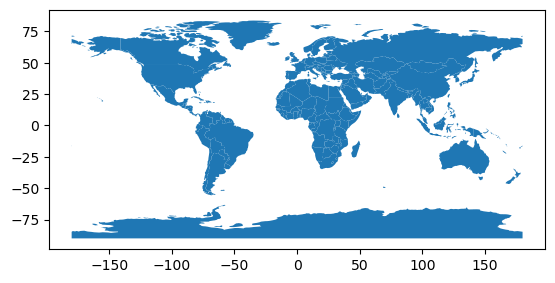

In [17]:
# geopandas
# here we first show the map
map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
pd.set_option("display.width",200)
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",200)
map.plot()
print(map)

# now we want to merge the data with the data from gdp



## Joining

<AxesSubplot: >

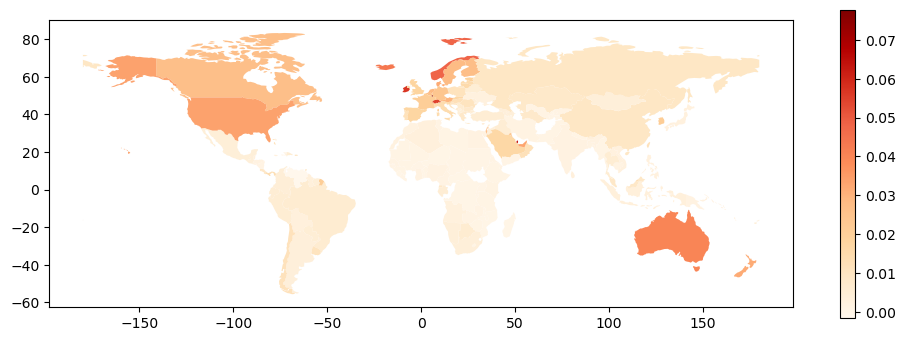

In [46]:
# this is how we load the csv data in pandas
# with the head, we read the first 5. 
gdp_world_data = pd.read_csv("gdp_world_data.csv", index_col=0)

# with set_index we can have the countries name as the first column
gdp_world_data = gdp_world_data.set_index('Country (or dependent territory)')
#gdp_world_data.fillna(0.0)

# making a new entru
gdp_world_data["2000-2019 GDP growth"] = gdp_world_data["2019"]-gdp_world_data["2000"]
gdp_world_data["2000-2019 GDP % growth"] = round(gdp_world_data["2000-2019 GDP growth"]/gdp_world_data["2000"]*100,2)
gdp_world_data = gdp_world_data.loc[:,["2000","2019","2000-2019 GDP growth", "2000-2019 GDP % growth"]]

# renaming 
gdp_world_data.columns = ["2000","2019","Growth", "%-growth"]
gdp_world_data.dropna()
gdp_world_data = gdp_world_data.dropna()

map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map.set_index("name")
map = map.rename(index={"United States of America":"United States",
                        "Central African Rep.":"Central African Republic",
                        "Dominican Rep.":"Dominican Republic",
                       "Dem. Rep. Congo":"Democratic Republic of the Congo",
                       "Solomon Is.":"Solomon Islands",
                       "Eq. Guinea":"Equatorial Guinea"})
data = map.join(gdp_world_data, how="outer")

pd.set_option("display.width",1000)
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",300)


#print(data)
# legend --> place 
# data.plot('%-growth', legend=True,cmap='OrRd', figsize=(12,4))

# per capita 
data['Growth per capita'] = data['Growth']/data['pop_est']
data.plot('Growth per capita',  legend=True,cmap='OrRd', figsize=(12,4))

# after plotting the growth per capita, we will notice that the western countries has
## the best growth per capita

## exploring another dataset --> min-wages

In [67]:
# similar to the previous part, we will use pd.read_csv to load the dataset
min_wages = pd.read_csv("min_wages.csv", index_col=0)
min_wages = min_wages.set_index("Country")
min_wages = min_wages.loc[:,["Workweek (hours)[2]", "Nominal hourly (US$)[6]"]]
# renaming the columns
min_wages.columns = ["Hours/week","US$/hour"]
min_wages = min_wages.dropna()
pd.set_option("display.width",1000)
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",300)

print(min_wages)

                                 Hours/week  US$/hour
Country                                              
Afghanistan                              40      0.50
Albania                                  40      1.16
Algeria                                  40      0.94
Andorra                                  40      6.85
Angola                                   44      0.73
Antigua and Barbuda                      40      3.04
Argentina                                48      2.33
Armenia                                  40      0.81
Australia                                38     15.26
Azerbaijan                               40      0.84
The Bahamas                              40      5.25
Bangladesh                               48      0.09
Barbados                                 40      3.13
Belarus                                  40      0.99
Belgium                                  38     11.42
Belize                                   45      1.65
Benin                       

In [68]:
# this is how we load the csv data in pandas
# with the head, we read the first 5. 
gdp_world_data = pd.read_csv("gdp_world_data.csv", index_col=0)

# with set_index we can have the countries name as the first column
gdp_world_data = gdp_world_data.set_index('Country (or dependent territory)')
#gdp_world_data.fillna(0.0)

# making a new entru
gdp_world_data["2000-2019 GDP growth"] = gdp_world_data["2019"]-gdp_world_data["2000"]
gdp_world_data["2000-2019 GDP % growth"] = round(gdp_world_data["2000-2019 GDP growth"]/gdp_world_data["2000"]*100,2)
gdp_world_data = gdp_world_data.loc[:,["2000","2019","2000-2019 GDP growth", "2000-2019 GDP % growth"]]

# renaming 
gdp_world_data.columns = ["2000","2019","Growth", "%-growth"]
gdp_world_data.dropna()
gdp_world_data = gdp_world_data.dropna()

map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map.set_index("name")
map = map.rename(index={"United States of America":"United States",
                        "Central African Rep.":"Central African Republic",
                        "Dominican Rep.":"Dominican Republic",
                       "Dem. Rep. Congo":"Democratic Republic of the Congo",
                       "Solomon Is.":"Solomon Islands",
                       "Eq. Guinea":"Equatorial Guinea"})
data = map.join(gdp_world_data, how="outer")

pd.set_option("display.width",1000)
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",300)


#print(data)
# legend --> place 
# data.plot('%-growth', legend=True,cmap='OrRd', figsize=(12,4))

# per capita 
data['Growth per capita'] = data['Growth']/data['pop_est']
#data.plot('Growth per capita',  legend=True,cmap='OrRd', figsize=(12,4))


# New dataset on minwages
min_wages = pd.read_csv("min_wages.csv", index_col=0)
min_wages = min_wages.set_index("Country")
min_wages = min_wages.loc[:,["Workweek (hours)[2]", "Nominal hourly (US$)[6]"]]
# renaming the columns
min_wages.columns = ["Hours/week","US$/hour"]

# Join it to our dataset
data = data.join(min_wages)

print(data)
 
# we wanna check the correlation now
print("___cor___")
print(data.corr())

# 0.05 is like no correlation
# also looking at the correlation results, we understand that 
# setting a min-wage is not correlated with GDP growth

                                       pop_est                continent iso_a3  gdp_md_est                                           geometry        2000        2019      Growth  %-growth  Growth per capita      Hours/week  US$/hour
Afghanistan                       3.804175e+07                     Asia    AFG     19291.0  POLYGON ((66.51861 37.36278, 67.07578 37.35614...         NaN         NaN         NaN       NaN                NaN              40      0.50
Albania                           2.854191e+06                   Europe    ALB     15279.0  POLYGON ((21.02004 40.84273, 20.99999 40.58000...      3483.0     15960.0     12477.0    358.23           0.004371              40      1.16
Algeria                           4.305305e+07                   Africa    DZA    171091.0  POLYGON ((-8.68440 27.39574, -8.66512 27.58948...     54749.0    183687.0    128938.0    235.51           0.002995              40      0.94
Angola                            3.182530e+07                   Afr

/var/folders/_3/5rnqtrnn1hddt_wgk0xq2kdh0000gn/T/ipykernel_2758/1453581265.py:57: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
